<h3> 8.18 </h3>

In [16]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from IPython.display import display

population = [9, 12, 15]

samples = list(itertools.product(population, repeat=3))

sample_means = [np.mean(sample) for sample in samples]
mean_counts = pd.Series(sample_means).value_counts().sort_index()
total_samples = len(samples)

mean_prob = mean_counts / total_samples

df = pd.DataFrame({
    'Sample Mean': mean_prob.index,
    'Probability': mean_prob.values
})

display(df)

mu_xbar = np.sum(df['Sample Mean'] * df['Probability'])
sigma_xbar_squared = np.sum(((df['Sample Mean'] - mu_xbar) ** 2) * df['Probability'])

mu = np.mean(population)
sigma_squared = np.var(population, ddof=0)

sigma_xbar_squared_theoretical = sigma_squared / 3

print(f"Population Mean (μ): {mu}")
print(f"Mean of Sampling Distribution (μx̄): {mu_xbar}")
print(f"Population Variance (σ²): {sigma_squared}")
print(f"Variance of Sampling Distribution (σ²x̄): {sigma_xbar_squared}")
print(f"Theoretical Variance (σ²/3): {sigma_xbar_squared_theoretical}")


,Sample Mean,Probability
0,9.0,0.037037
1,10.0,0.111111
2,11.0,0.222222
3,12.0,0.259259
4,13.0,0.222222
5,14.0,0.111111
6,15.0,0.037037


Population Mean (μ): 12.0
Mean of Sampling Distribution (μx̄): 11.999999999999998
Population Variance (σ²): 6.0
Variance of Sampling Distribution (σ²x̄): 1.9999999999999998
Theoretical Variance (σ²/3): 2.0


By inspection, we can see that the population mean is 12, and is equal to the mean of sampling distribution at 12. Similarly, The population variance at 6, shows that the theoretical variance as it is divided by three is 2, similar to the variance of sampling distribution.

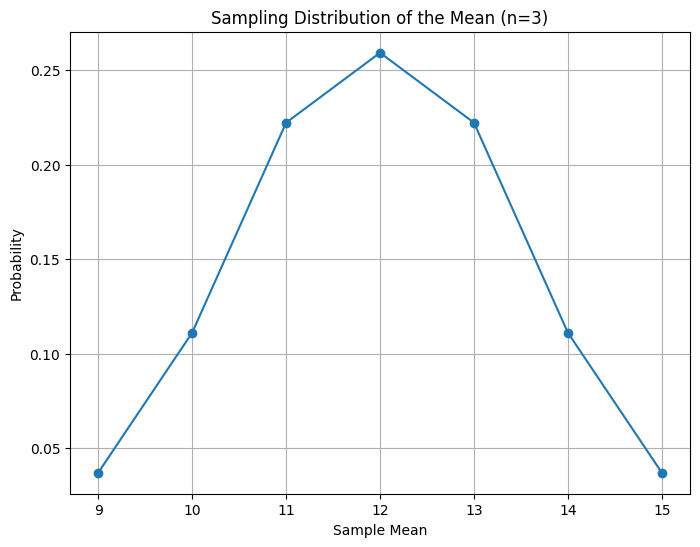

In [17]:
mean_series = pd.Series(sample_means)
mean_distribution = mean_series.value_counts(normalize=True).sort_index()

plt.figure(figsize=(8, 6))
plt.plot(mean_distribution.index, mean_distribution.values, marker='o', linestyle='-')
plt.title('Sampling Distribution of the Mean (n=3)')
plt.xlabel('Sample Mean')
plt.ylabel('Probability')
plt.xticks(mean_distribution.index)
plt.grid(True)

plt.show()

For better clariication, this is the accompanied graph for the sampling distribution of the mean, which is at the highest probability at 12.

<h3> 8.21</h3>

In [22]:
import itertools
import numpy as np
import pandas as pd
from IPython.display import display

population = [3, 7, 11, 15]

population_mean = np.mean(population)
population_std_dev = np.std(population)

mean_sampling_distribution = sample_means

n = 2  
std_dev_sampling_distribution = population_std_dev / np.sqrt(n)

samples = list(itertools.product(population, repeat=n))
sample_means = [np.mean(sample) for sample in samples]
mean_sampling_distribution = np.mean(sample_means)

print(f"Population: {population}")
print(f"Population Mean (μ): {population_mean:.2f}")
print(f"Population Standard Deviation (σ): {population_std_dev:.2f}")
print(f"Mean of the Sampling Distribution of Means (μ_x̄): {mean_sampling_distribution:.2f}")
print(f"Standard Deviation of the Sampling Distribution of Means (σ_x̄): {std_dev_sampling_distribution:.2f}")

samples_df = pd.DataFrame({
    'Sample': samples,
    'Sample Mean': sample_means
})

print("\nSamples and their means:")
display(samples_df)

Population: [3, 7, 11, 15]
Population Mean (μ): 9.00
Population Standard Deviation (σ): 4.47
Mean of the Sampling Distribution of Means (μ_x̄): 9.00
Standard Deviation of the Sampling Distribution of Means (σ_x̄): 3.16

Samples and their means:


,Sample,Sample Mean
0,"(3, 3)",3.0
1,"(3, 7)",5.0
2,"(3, 11)",7.0
3,"(3, 15)",9.0
4,"(7, 3)",5.0
5,"(7, 7)",7.0
6,"(7, 11)",9.0
7,"(7, 15)",11.0
8,"(11, 3)",7.0
9,"(11, 7)",9.0


<h3> 8.34</h3>

In [37]:
import scipy.stats as stats

children = 200
prob_boy = .5
prob_girl = 1- prob_boy

mean = n*prob_boy
std_dev  = np.sqrt( n *prob_boy *prob_girl)

#a  40 prc will be boys 
prb_a = stats.norm.cdf(children*.40, mean, std_dev)
print(f"Probability that less than 40% of the children will be boys is: {prb_a:.4} ")

#b  43 to 57 prc be girls
prb_b = stats.norm.cdf(children*.57,mean, std_dev) - stats.norm.cdf(children*.43,mean, std_dev)
print(f"Probability of children to be girls between 43% to 57& is: {prb_b:.4} ")

#c more than 57% are boys 
prb_c = 1 - stats.norm.cdf(children*.54, mean, std_dev)
print(f"Probability that more than 54% of the children will be boys is: {prb_c:.4f}")

Probability that less than 40% of the children will be boys is: 0.002339 
Probability of children to be girls between 43% to 57& is: 0.9523 
Probability that more than 54% of the children will be boys is: 0.1289


Since it is stated that we should assume equal probabilities for births of bot girls and boys, the probability of that happening must be both at 50%. 

<h3> 8.49</h3>

In [29]:
x = [6, 9, 12, 15, 18]
prob_x = [0.1, 0.2, 0.4, 0.2, 0.1]

samples = list(itertools.product(x, repeat=2))

population_mean = sum(x_i * p for x_i, p in zip(x, prob_x))
population_variance = sum(p * (x_i - population_mean) ** 2 for x_i, p in zip(x, prob_x))  # Fixed the typo here

sample_means = [(x1 + x2) / 2 for x1, x2 in samples]
sample_probabilities = [prob_x[x.index(x1)] * prob_x[x.index(x2)] for x1, x2 in samples]

df_4 = pd.DataFrame({
    'Sample': samples,
    'Mean': sample_means,
    'Probability': sample_probabilities
})

print(f"Population Mean: {population_mean:.0f}")
print(f"Population Variance: {population_variance:.1f}")

display(df_4)


Population Mean: 12
Population Variance: 10.8


,Sample,Mean,Probability
0,"(6, 6)",6.0,0.01
1,"(6, 9)",7.5,0.02
2,"(6, 12)",9.0,0.04
3,"(6, 15)",10.5,0.02
4,"(6, 18)",12.0,0.01
5,"(9, 6)",7.5,0.02
6,"(9, 9)",9.0,0.04
7,"(9, 12)",10.5,0.08
8,"(9, 15)",12.0,0.04
9,"(9, 18)",13.5,0.02
